In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/raw/WA_Fn-UseC_-HR-Employee-Attrition.csv")

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df ['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [7]:
dept_attrition = (
    df.groupby('Department')['Attrition']
      .apply(lambda x: (x == 'Yes').mean() * 100)
      .sort_values(ascending=False)
)

dept_attrition


Department
Sales                     20.627803
Human Resources           19.047619
Research & Development    13.839750
Name: Attrition, dtype: float64

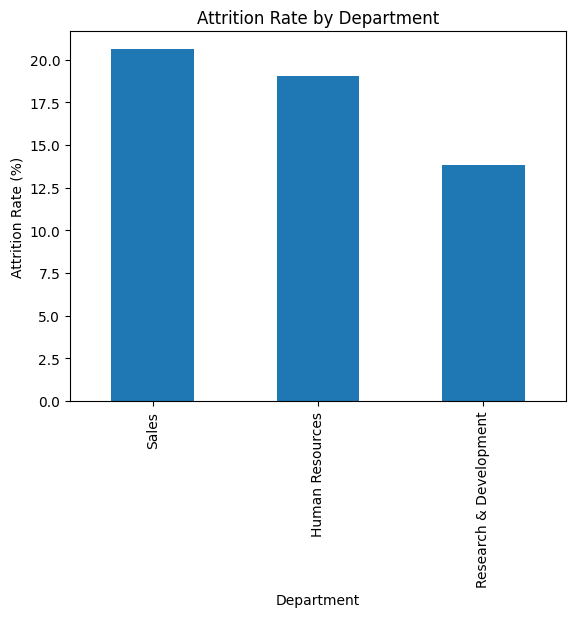

In [9]:
dept_attrition.plot(kind = 'bar')
plt.title("Attrition Rate by Department")
plt.ylabel("Attrition Rate (%)")
plt.show()

In [13]:
bins = [-1, 2, 5, 10, 20, 30, 100]
labels = ['0-2', '3-5', '6-10', '11-20', '21-30', '30+']

df['experience_group'] = pd.cut(df['YearsAtCompany'], bins=bins, labels=labels)

exp_attrition = (
    df.groupby('experience_group')['Attrition']
      .apply(lambda x: (x == 'Yes').mean() * 100)
)

exp_attrition

C:\Users\777ru\AppData\Local\Temp\ipykernel_22744\4136401082.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('experience_group')['Attrition']


experience_group
0-2      29.824561
3-5      13.824885
6-10     12.276786
11-20     6.666667
21-30     8.000000
30+      25.000000
Name: Attrition, dtype: float64

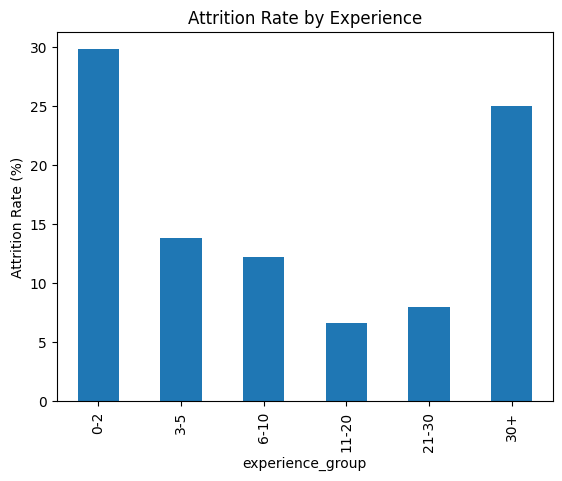

In [14]:
exp_attrition.plot(kind='bar')
plt.title("Attrition Rate by Experience")
plt.ylabel("Attrition Rate (%)")
plt.show()

In [15]:
ot_attrition = (
    df.groupby('OverTime')['Attrition']
      .apply(lambda x: (x == 'Yes').mean() * 100)
)

ot_attrition

OverTime
No     10.436433
Yes    30.528846
Name: Attrition, dtype: float64

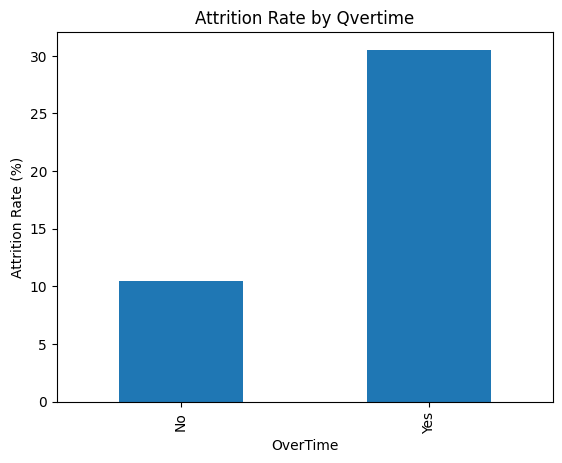

In [16]:
ot_attrition.plot(kind='bar')
plt.title("Attrition Rate by Qvertime")
plt.ylabel("Attrition Rate (%)")
plt.show()